In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import fft
from matplotlib.image import imread
from matplotlib.pyplot import imshow

A = imread('easter.PNG')

np.shape(A) #for getting the dimention
# imshow(A)

(200, 300, 4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


coef array  [[[ 7.03709814e+02+0.00000000e+00j  4.76039226e+01+1.36874506e+02j
   -2.22541173e+02+0.00000000e+00j  4.76039226e+01-1.36874506e+02j]
  [-3.65317063e+00-4.91726327e+01j -1.98166869e+01-6.20891566e+00j
    7.26088856e+00-1.40530137e+01j  1.53029321e+01-1.71229749e+01j]
  [-1.08033567e+01+1.40343416e+00j  1.00131216e+00+1.19241081e+01j
    6.25833523e-01-5.86725058e+00j -6.26937258e+00+4.94917872e-01j]
  ...
  [-6.73373460e+00-2.55302596e+00j -7.04335793e-01+2.60001104e+00j
   -1.64083949e+00+1.69976498e+00j  3.54845515e+00-2.49288407e+00j]
  [-1.08033567e+01-1.40343416e+00j -6.26937258e+00-4.94917872e-01j
    6.25833523e-01+5.86725058e+00j  1.00131216e+00-1.19241081e+01j]
  [-3.65317063e+00+4.91726327e+01j  1.53029321e+01+1.71229749e+01j
    7.26088856e+00+1.40530137e+01j -1.98166869e+01+6.20891566e+00j]]

 [[ 7.06949031e+02+0.00000000e+00j  5.00000011e+01+1.34392152e+02j
   -2.24266664e+02+0.00000000e+00j  5.00000011e+01-1.34392152e+02j]
  [ 9.93522794e-01-4.58219423e+01j 

NameError: name 'get_difference' is not defined

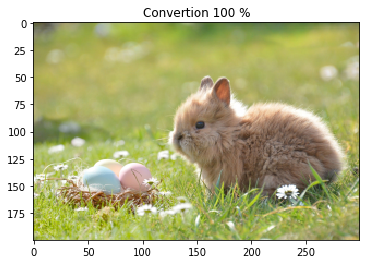

In [4]:
coef_array = fft.fft2(A) 
print('coef array ' , coef_array)

sorted_coef_array = np.sort(np.abs(coef_array.reshape(-1))) #sort coef and #reshape convert 2D array into a Vector
print('sorted coef array ',sorted_coef_array)
i=0
print('sorted coef array size' , sorted_coef_array.size)
for keep in (1,0.1,0.05,0.02,0.01,0.001):
    minimum_coef_index = int(np.floor((1-keep)*len(sorted_coef_array)))
    print('minimum coef index', minimum_coef_index)
    thresh = sorted_coef_array[minimum_coef_index] #minimum coef value
    print('text', np.abs(coef_array))
    ind = np.abs(coef_array) > thresh
    print('text2', ind)
    filtered_coef = coef_array*ind 
    real_valued_compressed_data = fft.ifft2(filtered_coef).real
#     print('text3', real_valued_compressed_data)
        
    plt.figure(i)
    plt.title('Convertion ' + str(keep*100) + ' %' )
    plt.imshow(real_valued_compressed_data)
    i += 1
    d = get_difference(A,real_valued_compressed_data)
    print(d)
    

In [ ]:
a= np.array([1, 2, 3,5,6,89])
b = a > 10
print(b * a)

In [5]:
def get_difference(original,filtered):
    differences = (np.subtract(original,filtered)).reshape(-1)
    avg_difference = (np.sum(differences))/differences.size
    return  avg_difference


def get_minimum_number_of_coef(image):
    coef_array = fft.fft2(image) 
    sorted_coef_array = np.sort(np.abs(coef_array.reshape(-1))) #sort coef and #reshape convert 2D array into a Vector
    i=237100
    while i<=228000:
        thresh = sorted_coef_array[i]
        ind = np.abs(coef_array) > thresh
        filtered_coef = coef_array*ind 
        real_valued_compressed_data = fft.ifft2(filtered_coef).real
    
        plt.figure(i)
        plt.title('Convert ' + str(i) + ' %' )
        plt.imshow(real_valued_compressed_data)
        i += 10
get_minimum_number_of_coef(A)       